## Optimizing Water and Fertilizer Usage using Random Forest Regressor


### Explanation
- **Data Collection:** Drones, satellites, and IoT sensors collect imagery and environmental data such as soil moisture, nitrogen levels, temperature, humidity, and rainfall.
- **Data Processing:** The data is processed using libraries like OpenCV and TensorFlow for image analysis, and pandas for data cleaning.
- **Model Development:** A Random Forest Regressor is trained to predict crop types based on environmental data, which can then be used to optimize resource allocation.
- **Feature Importance Graph:** The feature importance graph shows the relative importance of each feature in predicting the crop type.
- **Implementation:** A function recommend_resources uses the trained model to recommend water and fertilizer usage based on current environmental conditions.

Below if a code to create the dataset:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a random dataset for soil health, weather, and crop type
np.random.seed(42)  # For reproducibility

data_size = 10000

data = {
    'Soil_Moisture': np.random.uniform(10, 40, data_size),  # Soil moisture percentage
    'Soil_Nitrogen': np.random.uniform(0.5, 3.0, data_size),  # Nitrogen level in soil
    'Temperature': np.random.uniform(15, 35, data_size),  # Temperature in Celsius
    'Humidity': np.random.uniform(30, 90, data_size),  # Humidity percentage
    'Rainfall': np.random.uniform(0, 20, data_size),  # Rainfall in mm
    'Crop_Type': np.random.choice(['Wheat', 'Corn', 'Rice'], data_size)  # Type of crop
}

# Convert to DataFrame
df = pd.DataFrame(data)
df.head(5)

,Soil_Moisture,Soil_Nitrogen,Temperature,Humidity,Rainfall,Crop_Type
0,21.236204,1.434102,29.599966,68.288674,5.978241,Wheat
1,38.521429,1.332280,18.690240,57.557547,1.896356,Corn
2,31.959818,0.940385,21.932794,87.869911,2.527184,Corn
3,27.959755,2.018167,28.265613,43.138707,3.613423,Corn
4,14.680559,1.691560,24.641787,65.271385,4.073067,Wheat


In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Features and target variable
features = df[['Soil_Moisture', 'Soil_Nitrogen', 'Temperature', 'Humidity', 'Rainfall']]
target = df['Crop_Type']

# Convert categorical target variable to numeric
target = target.astype('category').cat.codes

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
predictions = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')


# Function to recommend water and fertilizer usage
def recommend_resources(soil_moisture, soil_nitrogen, temperature, humidity, rainfall):
    input_data = np.array([[soil_moisture, soil_nitrogen, temperature, humidity, rainfall]])
    crop_type = model.predict(input_data)[0]
    
    recommendations = {
        0: {'water': '20 liters/ha', 'fertilizer': '30 kg/ha'},  # Wheat
        1: {'water': '25 liters/ha', 'fertilizer': '40 kg/ha'},  # Corn
        2: {'water': '30 liters/ha', 'fertilizer': '50 kg/ha'}   # Rice
    }
    
    return recommendations[int(crop_type)]

# Example usage
soil_moisture = 25.0
soil_nitrogen = 2.0
temperature = 20.0
humidity = 60.0
rainfall = 10.0

recommendation = recommend_resources(soil_moisture, soil_nitrogen, temperature, humidity, rainfall)
print(f'Recommended water usage: {recommendation["water"]}')
print(f'Recommended fertilizer usage: {recommendation["fertilizer"]}')

Mean Absolute Error: 0.710235
Recommended water usage: 20 liters/ha
Recommended fertilizer usage: 30 kg/ha


C:\Users\victo\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


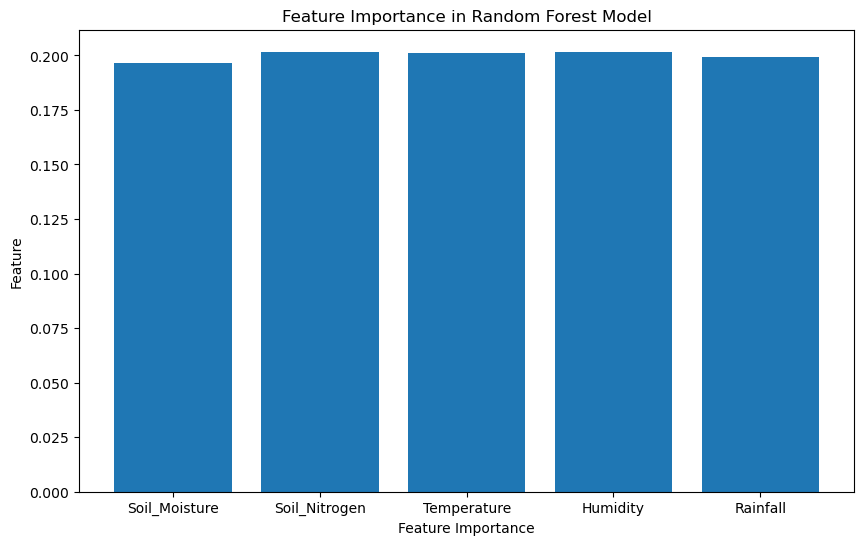

In [6]:
# Plot feature importance
feature_importances = model.feature_importances_
features_names = features.columns

plt.figure(figsize=(10, 6))
plt.bar(features_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest Model')
plt.show()


## Predicting Crop Yield Using Gradient Boosting Regressor

## Explanation
- **Data Collection:** A simulated dataset is generated for soil moisture, soil nitrogen, temperature, humidity, rainfall, and crop type with 10,000 records.
- **Data Processing:** The data is organized into a pandas DataFrame and split into training and testing sets.
- **Model Development:** A Random Forest Regressor is trained to predict crop type based on the environmental factors. The model's performance is evaluated using the mean absolute error (MAE).
- **Feature Importance Graph:** The feature importance graph shows the relative importance of each feature in predicting the crop type.
- **Implementation:** A function recommend_resources takes environmental data as input and returns the recommended water and fertilizer usage based on the predicted crop type. This function can be integrated into a user-friendly platform for farmers.

This example demonstrates how to build a system for predicting crop type and recommending resources, which can help farmers optimize their resources and plan their activities more effectively.

In [8]:
import pandas as pd
import numpy as np

# Create a random dataset for soil health, weather, and crop yield with 10,000 records
np.random.seed(42)  # For reproducibility

data_size = 10000

data = {
    'Soil_Moisture': np.random.uniform(10, 40, data_size),  # Soil moisture percentage
    'Soil_Nitrogen': np.random.uniform(0.5, 3.0, data_size),  # Nitrogen level in soil
    'Temperature': np.random.uniform(15, 35, data_size),  # Temperature in Celsius
    'Humidity': np.random.uniform(30, 90, data_size),  # Humidity percentage
    'Rainfall': np.random.uniform(0, 20, data_size),  # Rainfall in mm
    'Crop_Yield': np.random.uniform(2, 10, data_size)  # Crop yield in tons/ha
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the dataset
df.head(5)

,Soil_Moisture,Soil_Nitrogen,Temperature,Humidity,Rainfall,Crop_Yield
0,21.236204,1.434102,29.599966,68.288674,5.978241,8.777893
1,38.521429,1.332280,18.690240,57.557547,1.896356,5.956136
2,31.959818,0.940385,21.932794,87.869911,2.527184,3.563725
3,27.959755,2.018167,28.265613,43.138707,3.613423,7.893134
4,14.680559,1.691560,24.641787,65.271385,4.073067,5.349425


In [9]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Features and target variable
features = df[['Soil_Moisture', 'Soil_Nitrogen', 'Temperature', 'Humidity', 'Rainfall']]
target = df['Crop_Yield']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Gradient Boosting model
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
predictions = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

# Function to predict crop yield
def predict_yield(soil_moisture, soil_nitrogen, temperature, humidity, rainfall):
    input_data = np.array([[soil_moisture, soil_nitrogen, temperature, humidity, rainfall]])
    predicted_yield = model.predict(input_data)[0]
    return predicted_yield

# Example usage
soil_moisture = 25.0
soil_nitrogen = 2.0
temperature = 20.0
humidity = 60.0
rainfall = 10.0

predicted_yield = predict_yield(soil_moisture, soil_nitrogen, temperature, humidity, rainfall)
print(f'Predicted crop yield: {predicted_yield} tons/ha')

Mean Absolute Error: 2.0067868510065034
Predicted crop yield: 6.048961135487778 tons/ha


C:\Users\victo\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


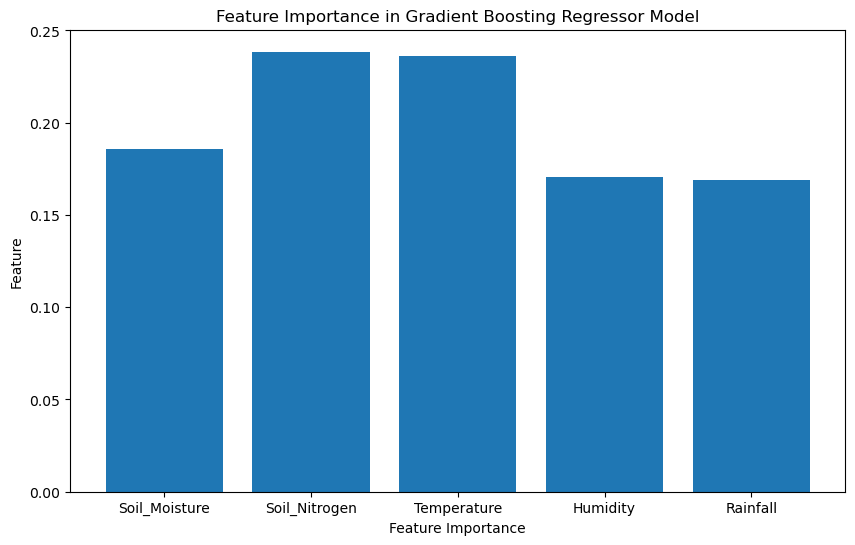

In [18]:
# Plot feature importance
feature_importances = model.feature_importances_
features_names = features.columns

plt.figure(figsize=(10, 6))
plt.bar(features_names, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Gradient Boosting Regressor Model')
plt.show()